# Project_ES290
Pojeto de localização de dispositivos móveis da disciplina Comunicações Móveis (ES290) - UFPE 2024.1

In [30]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.spatial import distance

import folium
from folium.plugins import HeatMap
import pandas as pd

In [31]:
df_bts = pd.read_csv('data/bts.csv')
df_bts

,grupo,btsId,btsNetNome,lat,lon,cch,azimuth,RssiId
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.952000,873,0,rssi_1_1
1,1,BTS_1_2,PEMDL01_2,-8.04342,-34.952000,872,120,rssi_1_2
2,1,BTS_1_3,PEMDL01_3,-8.04342,-34.952000,875,240,rssi_1_3
3,2,BTS_2_1,PEMDL08_1,-8.05289,-34.944672,865,0,rssi_2_1
4,2,BTS_2_2,PEMDL08_2,-8.05289,-34.944672,874,120,rssi_2_2
5,2,BTS_2_3,PEMDL08_3,-8.05289,-34.944672,871,240,rssi_2_3
6,3,BTS_3_1,PEMDL09_1,-8.05532,-34.957900,877,0,rssi_3_1
7,3,BTS_3_2,PEMDL09_2,-8.05532,-34.957900,881,120,rssi_3_2
8,3,BTS_3_3,PEMDL09_3,-8.05532,-34.957900,869,240,rssi_3_3


In [32]:

df = pd.read_csv('data/meds_train_alunos.csv')
df

,ponto_id,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,lat,lon,indoor
0,6604,-103.705000,-110.425000,-107.381667,-110.330000,-108.345000,-106.590000,-107.153333,-102.120000,-115.0000,5.0,3.0,2.0,-8.055786,-34.951505,True
1,5515,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-88.470000,-94.024286,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,True
2,5049,-102.610000,-115.000000,-101.380000,-115.000000,-104.295000,-97.360000,-96.980000,-99.572500,-115.0000,5.0,3.0,2.0,-8.055506,-34.951693,True
3,8737,-89.140000,-97.251429,-86.642857,-96.036667,-96.592500,-92.460000,-86.813333,-102.688000,-87.2700,4.0,7.0,2.0,-8.050390,-34.959630,False
4,1203,-109.088333,-107.200000,-107.010000,-108.430000,-104.845714,-101.435714,-103.065000,-102.110000,-115.0000,5.0,3.0,2.0,-8.055380,-34.951736,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,5734,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-93.005000,-97.114286,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,True
6771,5191,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-87.315000,-88.735714,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,True
6772,5390,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-95.165000,-90.705714,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,True
6773,860,-109.088333,-107.200000,-107.010000,-108.430000,-97.200000,-98.148571,-99.840000,-94.665000,-115.0000,5.0,3.0,2.0,-8.055380,-34.951736,True


In [33]:
df = df.dropna()
df

,ponto_id,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,lat,lon,indoor
0,6604,-103.705000,-110.425000,-107.381667,-110.330000,-108.345000,-106.590000,-107.153333,-102.120000,-115.0000,5.0,3.0,2.0,-8.055786,-34.951505,True
1,5515,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-88.470000,-94.024286,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,True
2,5049,-102.610000,-115.000000,-101.380000,-115.000000,-104.295000,-97.360000,-96.980000,-99.572500,-115.0000,5.0,3.0,2.0,-8.055506,-34.951693,True
3,8737,-89.140000,-97.251429,-86.642857,-96.036667,-96.592500,-92.460000,-86.813333,-102.688000,-87.2700,4.0,7.0,2.0,-8.050390,-34.959630,False
4,1203,-109.088333,-107.200000,-107.010000,-108.430000,-104.845714,-101.435714,-103.065000,-102.110000,-115.0000,5.0,3.0,2.0,-8.055380,-34.951736,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,5734,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-93.005000,-97.114286,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,True
6771,5191,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-87.315000,-88.735714,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,True
6772,5390,-105.225000,-115.000000,-105.210000,-115.000000,-105.835000,-115.000000,-95.165000,-90.705714,-108.1200,5.0,3.0,2.0,-8.055784,-34.951608,True
6773,860,-109.088333,-107.200000,-107.010000,-108.430000,-97.200000,-98.148571,-99.840000,-94.665000,-115.0000,5.0,3.0,2.0,-8.055380,-34.951736,True


In [34]:
df.describe()

,ponto_id,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,lat,lon
count,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000,6775.000000
mean,4856.099779,-100.789923,-105.688802,-100.545198,-103.524786,-97.210290,-97.193499,-93.644749,-93.353728,-107.478361,4.679410,3.159262,2.504945,-8.054510,-34.951792
std,2785.645694,10.025728,10.397924,9.968138,13.367328,8.853480,9.992950,7.688089,8.110877,11.003407,0.911469,1.009927,1.095094,0.002388,0.002310
min,1.000000,-115.000000,-115.000000,-115.000000,-115.000000,-115.000000,-115.000000,-113.140000,-115.630000,-115.000000,1.000000,0.000000,0.000000,-8.059550,-34.959850
25%,2434.500000,-107.650000,-115.000000,-107.148571,-115.000000,-102.202857,-101.652857,-99.480000,-99.005000,-115.000000,5.000000,3.000000,2.000000,-8.055784,-34.951728
50%,4875.000000,-103.040000,-110.425000,-99.750000,-108.430000,-97.170000,-95.615714,-94.785000,-95.688000,-115.000000,5.000000,3.000000,2.000000,-8.055494,-34.951597
75%,7272.500000,-93.455000,-97.350000,-93.340000,-96.817917,-92.080000,-91.951429,-89.375000,-89.610500,-97.600000,5.000000,3.000000,3.000000,-8.055310,-34.951331
max,9676.000000,-61.380000,-64.820000,-60.640000,-36.960000,-59.170000,-56.980000,-56.060000,-55.870000,-52.540000,8.000000,7.000000,7.000000,-8.046420,-34.945110


In [35]:
df.dtypes

ponto_id      int64
rssi_1_1    float64
rssi_1_2    float64
rssi_1_3    float64
rssi_2_1    float64
rssi_2_2    float64
rssi_2_3    float64
rssi_3_1    float64
rssi_3_2    float64
rssi_3_3    float64
delay_1     float64
delay_2     float64
delay_3     float64
lat         float64
lon         float64
indoor         bool
dtype: object

In [36]:
df_indoors = df[df['indoor'] == True]
df_indoors

,ponto_id,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,lat,lon,indoor
0,6604,-103.705000,-110.425,-107.381667,-110.33,-108.345000,-106.590000,-107.153333,-102.120000,-115.00,5.0,3.0,2.0,-8.055786,-34.951505,True
1,5515,-105.225000,-115.000,-105.210000,-115.00,-105.835000,-115.000000,-88.470000,-94.024286,-108.12,5.0,3.0,2.0,-8.055784,-34.951608,True
2,5049,-102.610000,-115.000,-101.380000,-115.00,-104.295000,-97.360000,-96.980000,-99.572500,-115.00,5.0,3.0,2.0,-8.055506,-34.951693,True
4,1203,-109.088333,-107.200,-107.010000,-108.43,-104.845714,-101.435714,-103.065000,-102.110000,-115.00,5.0,3.0,2.0,-8.055380,-34.951736,True
7,1926,-98.748000,-99.670,-98.610000,-97.86,-92.837500,-90.747143,-100.030000,-95.250000,-115.00,5.0,3.0,3.0,-8.055494,-34.951316,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6769,6265,-103.705000,-110.425,-107.381667,-110.33,-98.065000,-105.560000,-100.240000,-99.570000,-115.00,5.0,3.0,2.0,-8.055786,-34.951505,True
6770,5734,-105.225000,-115.000,-105.210000,-115.00,-105.835000,-115.000000,-93.005000,-97.114286,-108.12,5.0,3.0,2.0,-8.055784,-34.951608,True
6771,5191,-105.225000,-115.000,-105.210000,-115.00,-105.835000,-115.000000,-87.315000,-88.735714,-108.12,5.0,3.0,2.0,-8.055784,-34.951608,True
6772,5390,-105.225000,-115.000,-105.210000,-115.00,-105.835000,-115.000000,-95.165000,-90.705714,-108.12,5.0,3.0,2.0,-8.055784,-34.951608,True


In [37]:
df_outdoors = df[df['indoor'] == False]
df_outdoors

,ponto_id,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,lat,lon,indoor
3,8737,-89.140000,-97.251429,-86.642857,-96.036667,-96.5925,-92.460000,-86.813333,-102.688000,-87.2700,4.0,7.0,2.0,-8.05039,-34.95963,False
5,6952,-91.530000,-99.115714,-89.424286,-96.235000,-92.8375,-93.327143,-82.363333,-81.940000,-79.3400,6.0,5.0,0.0,-8.05578,-34.95639,False
6,8875,-80.246429,-98.010714,-81.366667,-99.550000,-97.2450,-93.067143,-71.000000,-99.934667,-95.8475,3.0,4.0,3.0,-8.04971,-34.95464,False
10,6847,-91.322857,-99.284286,-91.764286,-102.910000,-92.8475,-95.252857,-87.356667,-74.904000,-87.3500,6.0,6.0,0.0,-8.05625,-34.95713,False
11,7610,-84.631429,-99.635714,-86.477143,-95.720000,-100.2250,-88.232857,-78.955000,-89.444000,-61.0800,6.0,6.0,0.0,-8.05402,-34.95955,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6752,9274,-100.631429,-90.381429,-97.050714,-68.890000,-89.4825,-84.471429,-86.500000,-90.834000,-96.9200,3.0,2.0,6.0,-8.04837,-34.94554,False
6753,8666,-83.708571,-94.275000,-88.080000,-96.340000,-97.5075,-96.057143,-87.583333,-98.048000,-96.7075,3.0,4.0,3.0,-8.05055,-34.95351,False
6762,6949,-88.731429,-99.574286,-83.260000,-94.765000,-99.0650,-78.950000,-87.240000,-85.380000,-70.0800,6.0,6.0,0.0,-8.05579,-34.95879,False
6765,8322,-88.152857,-98.278571,-90.050000,-99.840000,-99.4975,-92.188571,-79.693333,-95.630000,-86.4300,4.0,6.0,1.0,-8.05169,-34.95775,False


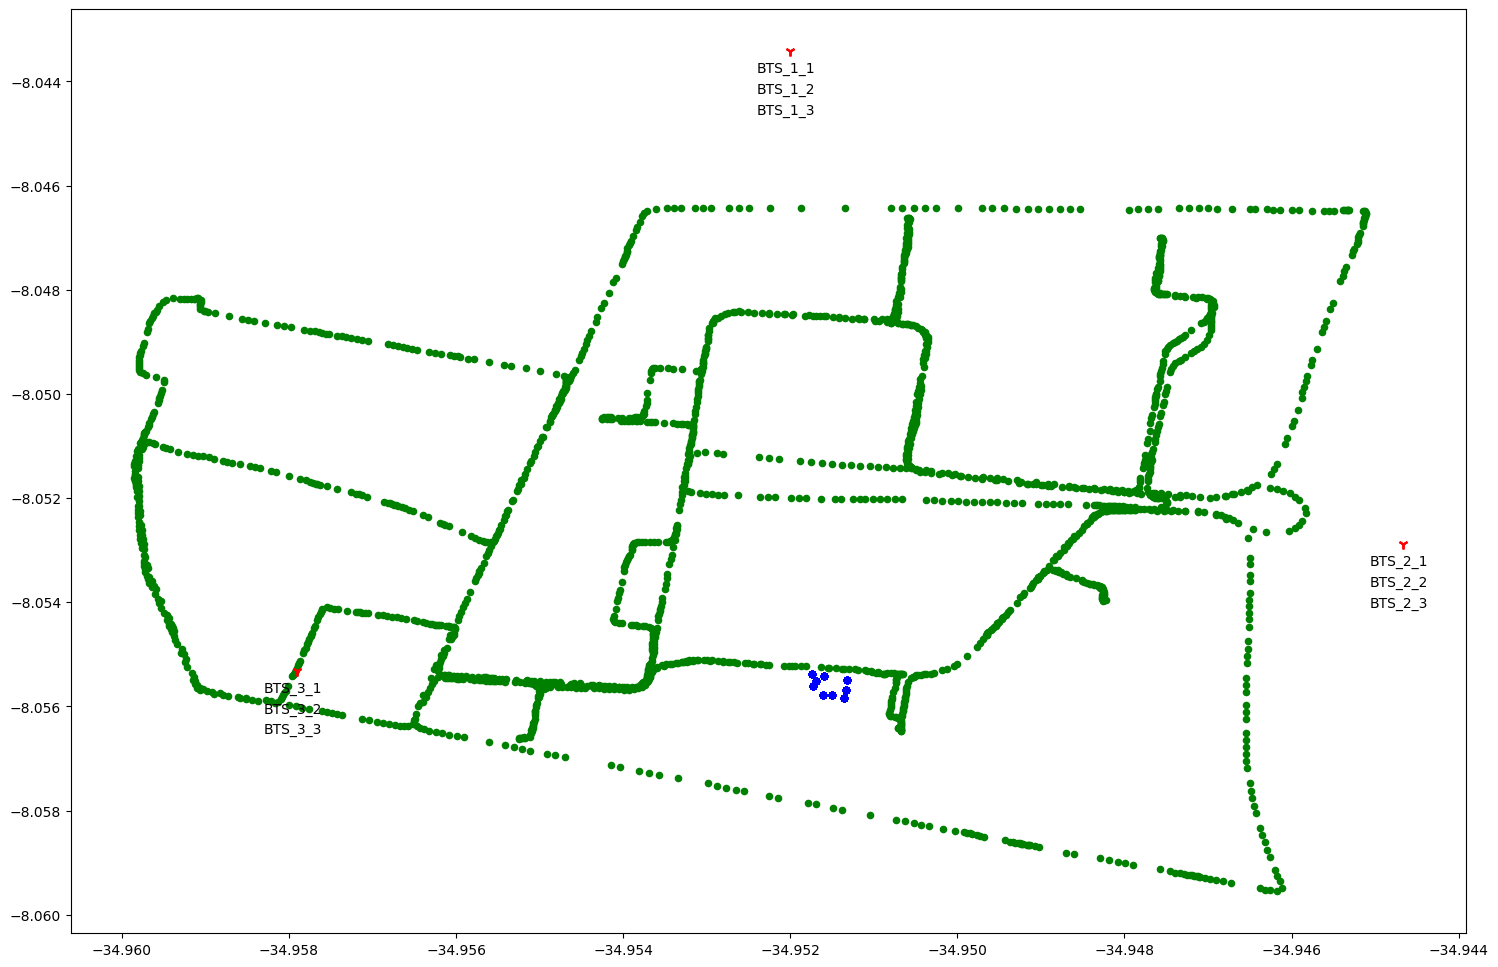

In [42]:
fig, subs = plt.subplots()

subs.scatter(df_indoors['lon'], df_indoors['lat'], color='blue', s = 20)
subs.scatter(df_outdoors['lon'], df_outdoors['lat'], color='green', s = 20)
subs.scatter(df_bts['lon'], df_bts['lat'], color = 'red', s = 50, alpha = 1, marker = '1')

aux_bts_dict = {}
for i, row in df_bts.iterrows():
    coordinates = (row['lon'], row['lat'])
    if coordinates not in aux_bts_dict:
        aux_bts_dict[coordinates] = 1
    else:
        aux_bts_dict[coordinates] += 1
    subs.annotate(row['btsId'], coordinates, xytext=(coordinates[0]-0.0004, coordinates[1]-0.0004 * aux_bts_dict[coordinates]))

plt.gcf().set_size_inches((18,12))
plt.show()

In [43]:
norm = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))
df['delay_1_norm'] = norm(df['delay_1'])
df['delay_2_norm'] = norm(df['delay_2'])
df['delay_3_norm'] = norm(df['delay_3'])
df['color'] = df.apply(lambda row: (row['delay_1_norm'], row['delay_2_norm'], row['delay_3_norm']), axis=1)

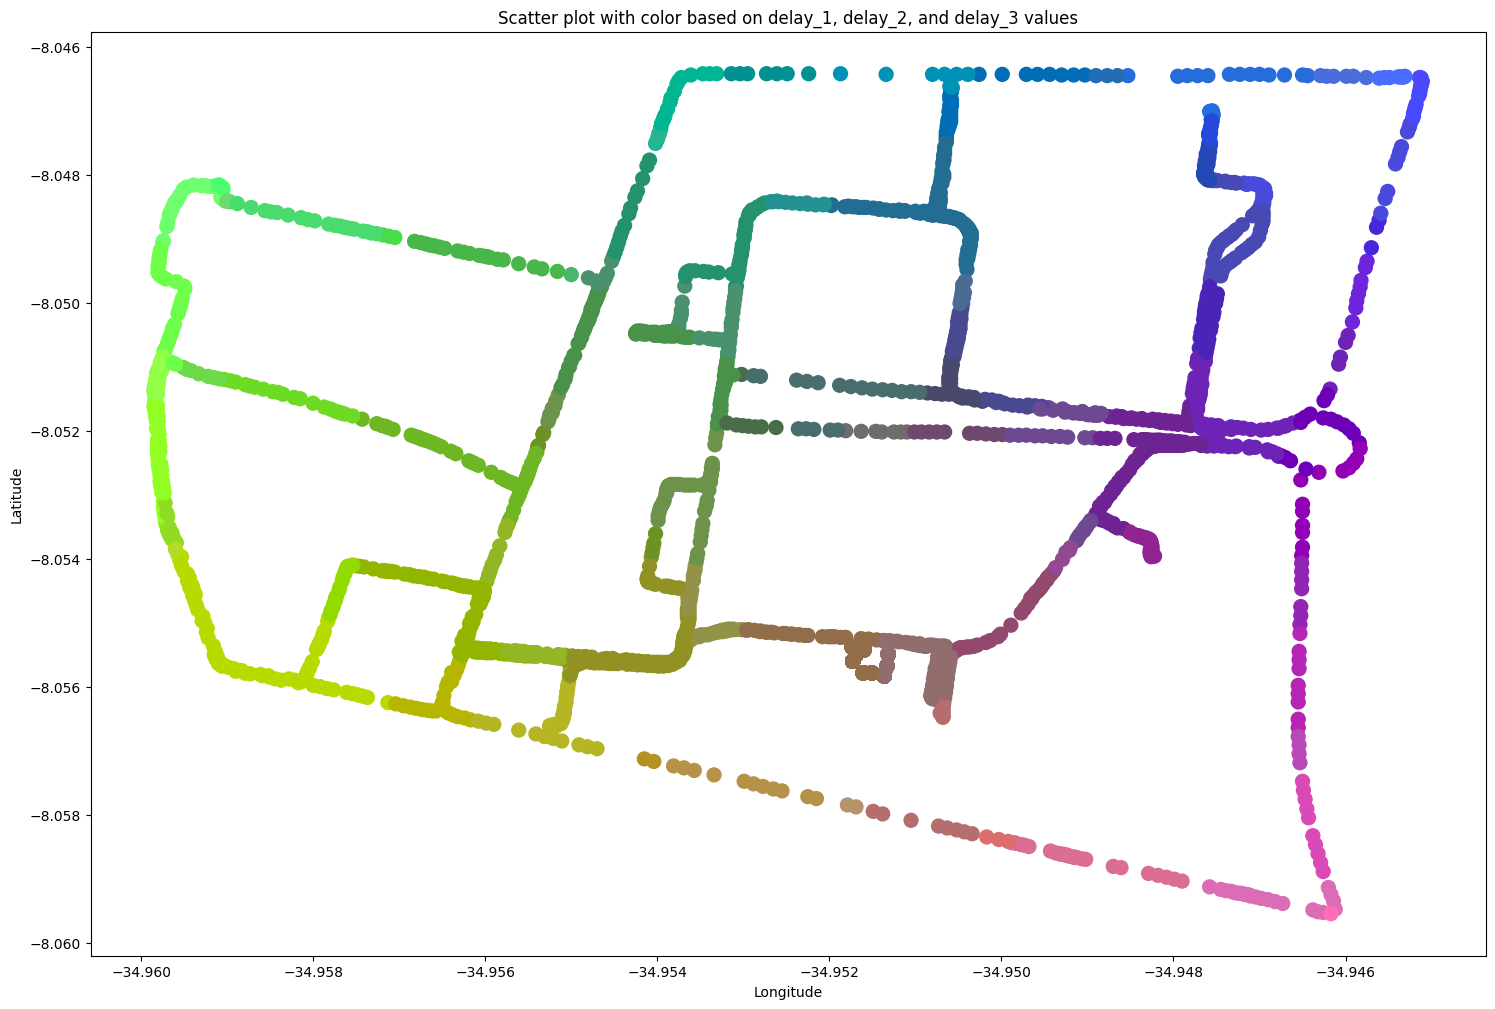

In [54]:
plt.scatter(df['lon'], df['lat'], color=df['color'], s=100)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter plot with color based on delay_1, delay_2, and delay_3 values')

plt.gcf().set_size_inches((18,12))
plt.show()

In [39]:
map_center = [df['lat'].mean(), df['lon'].mean()]
mymap = folium.Map(location=map_center, zoom_start=6)

heat_data = [[row['lat'], row['lon']] for index, row in df.iterrows()]

HeatMap(heat_data).add_to(mymap)

mymap.save("heatmap.html")

In [40]:
map_center = [df_indoors['lat'].mean(), df_indoors['lon'].mean()]
mymap = folium.Map(location=map_center, zoom_start=6)

heat_data = [[row['lat'], row['lon']] for index, row in df_indoors.iterrows()]

HeatMap(heat_data).add_to(mymap)

mymap.save("heatmap_indoors.html")

In [41]:
map_center = [df_outdoors['lat'].mean(), df_outdoors['lon'].mean()]
mymap = folium.Map(location=map_center, zoom_start=6)

heat_data = [[row['lat'], row['lon']] for index, row in df_outdoors.iterrows()]

HeatMap(heat_data).add_to(mymap)

mymap.save("heatmap_outdoors.html")